In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Completer.use_jedi = False
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import pandas as pd

Instructions for updating:
non-resource variables are not supported in the long term


오토 인코더(Auto Encoder)

아주 간단하면서 강력한 비지도 학습 딥러닝 모델로 입력값을 압축시킨 후, 다시 압축된 정보를 복원해서 입력값과 동일한 출려값을 가지도록 리턴하는 학습 모델이다.  
학습 과정을 통해 최대한 입력값과 출력값이 일치하도록 모델의 파라미터가 최적화 되고 오토 인코더의 압축된 정보는 입력값에서 노이즈가 제거된 핵심 특징들로 구성된 저차원 데이터로 간주되어 주로 차원 축소의 목적으로 오토 인코더가 많이 사용된다.

<img src="./images/autoencoder.png" align="left" width="1000"/>

오토 인코더는 크게 인코더와 디코더로 구분되어 있고, 인코더와 디코더 사이에 압축된 정보가 존재한다.  
인코더와 디코더는 덴즈 레이어로 구성되어 있고, 인코더와 디코더 사이에는 입력되는 원본값 보다 작은 차원을 가지는 덴즈 레이어를 두어 정보를 압축한다.

MNIST 손글씨 데이터를 오토 인코더를 사용해서 차원 축소 후 시각화 한다.

MNIST 손글씨 데이터를 획득한다.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


MNIST 데이터 전처리

획득된 학습 데이터는 오토 인코더 학습에 사용하고 테스트 데이터 중 500개의 데이터만 선택해서 시각화에 사용한다.

In [3]:
x_train = x_train.reshape(60000, 784) # 학습 데이터

# 테스트 데이터 중 500개만 선택해서 테스트 데이터로 사용한다. => 데이터 시각화에 사용한다.
x_test = x_test[:500]
x_test = x_test.reshape(500, 784) # 테스트 데이터
y_test = y_test[:500]

# 데이터 정규화
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
gray_scale = 255
x_train /= gray_scale
x_test /= gray_scale

텐서플로우를 이용해서 오토 인코더 모델을 만든다.

In [4]:
# 오토 인코더 모델을 구현한다.
_input = tf.placeholder(dtype=tf.float32, shape=[None, 28 * 28]) # 오토 인코더의 입력으로 사용할 placeholder
encoder = tf.layers.dense(_input, 128, tf.nn.tanh) # 인코더
bottlenect = tf.layers.dense(encoder, 3) # 3차원으로 차원 축소
decoder = tf.layers.dense(bottlenect, 128, tf.nn.tanh) # 디코더
_output = tf.layers.dense(decoder, 28 * 28, tf.nn.sigmoid) # 출력

# 손실 함수와 Adam 옵티마이저
loss = tf.losses.mean_squared_error(labels=_input, predictions=_output) # 손실 함수
train = tf.train.AdamOptimizer(0.002).minimize(loss) # 최적화

학습 시킨다.

In [5]:
tf.set_random_seed(35)
epoch_cnt = 50
batch_size = 5000
iteration = len(x_train) // batch_size

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print('학습 시작...')
    for epoch in range(epoch_cnt):
        avg_loss = 0.0
        start = 0
        end = batch_size
        for i in range(iteration):
            _, loss_ = sess.run([train, loss], feed_dict={_input: x_train[start:end]})
            start += batch_size
            end += batch_size
            avg_loss += loss_ / iteration
        # ===== for i => 배치 종료
        print('epoch: {:2d}, loss: {:6.4f}'.format(epoch, avg_loss))
    # ===== for epoch => 학습 종료
    
    # 학습이 완료되면 오토 인코더를 사용해서 3차원으로 압축된 벡터를 저장한다.
    _bottlenect = sess.run(bottlenect, feed_dict={_input: x_test})
    print(_bottlenect)

학습 시작...
epoch:  0, loss: 0.1727
epoch:  1, loss: 0.0729
epoch:  2, loss: 0.0682
epoch:  3, loss: 0.0674
epoch:  4, loss: 0.0664
epoch:  5, loss: 0.0646
epoch:  6, loss: 0.0622
epoch:  7, loss: 0.0598
epoch:  8, loss: 0.0583
epoch:  9, loss: 0.0573
epoch: 10, loss: 0.0566
epoch: 11, loss: 0.0560
epoch: 12, loss: 0.0554
epoch: 13, loss: 0.0548
epoch: 14, loss: 0.0542
epoch: 15, loss: 0.0537
epoch: 16, loss: 0.0532
epoch: 17, loss: 0.0528
epoch: 18, loss: 0.0524
epoch: 19, loss: 0.0520
epoch: 20, loss: 0.0517
epoch: 21, loss: 0.0514
epoch: 22, loss: 0.0511
epoch: 23, loss: 0.0508
epoch: 24, loss: 0.0505
epoch: 25, loss: 0.0503
epoch: 26, loss: 0.0500
epoch: 27, loss: 0.0497
epoch: 28, loss: 0.0495
epoch: 29, loss: 0.0492
epoch: 30, loss: 0.0490
epoch: 31, loss: 0.0488
epoch: 32, loss: 0.0485
epoch: 33, loss: 0.0483
epoch: 34, loss: 0.0481
epoch: 35, loss: 0.0479
epoch: 36, loss: 0.0476
epoch: 37, loss: 0.0474
epoch: 38, loss: 0.0472
epoch: 39, loss: 0.0470
epoch: 40, loss: 0.0468
epoch: 

압축된 데이터를 시각화 한다.

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

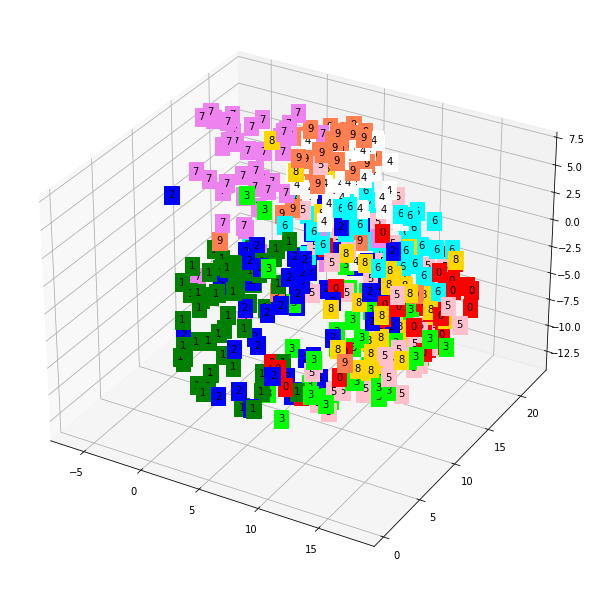

In [7]:
plt.figure(figsize=[10, 8])
fig = plt.figure(1)
ax = Axes3D(fig)

xs = _bottlenect[:, 0]
ys = _bottlenect[:, 1]
zs = _bottlenect[:, 2]

color = ['red', 'green', 'blue', 'lime', 'white', 'pink', 'aqua', 'violet', 'gold', 'coral']
for x, y, z, label in zip(xs, ys, zs, y_test):
    # print(x, y, x, label)
    c = color[int(label)]
    ax.text(x, y, z, label, backgroundcolor=c)

ax.set_xlim(xs.min(), xs.max())
ax.set_ylim(ys.min(), ys.max())
ax.set_zlim(zs.min(), zs.max())
plt.show()